# Exercise 14

## Predict rating using LSTM


#### Carolina Padilla Hernández 201111402
#### Wilson Felipe González Cantor 200924943
#### Jonny Eduardo Coronel Villamil 201411692
#### David Tavera Sánchez 201016123

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
len(plots)

7895

In [6]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [7]:
lista =plots.tolist()
llen=list()
for l in lista:
  llen.append(len(l.split()))
pd.Series(llen).describe(percentiles=[0.8,0.9,0.95,0.975])

count    7895.000000
mean      144.770868
std        95.816408
min         1.000000
50%       127.000000
80%       205.200000
90%       274.600000
95%       328.000000
97.5%     379.650000
max      1863.000000
dtype: float64

In [8]:
X = plots.tolist()

vect = CountVectorizer(stop_words='english',lowercase=True)
X_dtm = vect.fit_transform(X)
words = list(vect.vocabulary_.keys())
vocabulary = {x: idx + 1 for idx, x in enumerate(set(words))}
lp=list()
max_len=500
for p in X:
    lidx=list()
    #print(p)
    listapalabras=p.split()
    #print(listapalabras)
    for w in listapalabras:
      if w in vocabulary.keys():
        lidx.append(vocabulary[w])
    lp.append(lidx)
    #print(len(lidx))
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(lp, maxlen=max_len)
len(X_pad)
X_pad

Using TensorFlow backend.


array([[    0,     0,     0, ..., 35059,  2696, 13931],
       [    0,     0,     0, ..., 37380, 10660, 32258],
       [    0,     0,     0, ..., 10345, 21392,  8010],
       ...,
       [    0,     0,     0, ...,  1429, 35650,  7055],
       [    0,     0,     0, ...,  4789, 32601, 13215],
       [    0,     0,     0, ..., 13954, 35307, 14591]], dtype=int32)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [9]:
pip install livelossplot

In [10]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from livelossplot import PlotLossesKeras

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)
X_train.shape

(5289, 500)

In [11]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          4911488   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,932,129
Trainable params: 4,932,129
Non-trainable params: 0
_________________________________________________________________


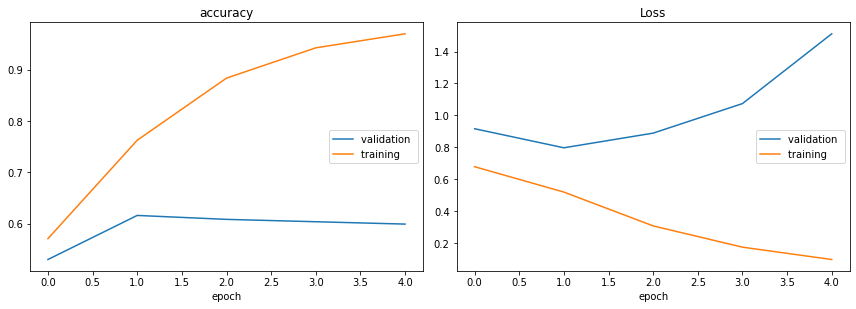

accuracy
	validation       	 (min:    0.530, max:    0.616, cur:    0.599)
	training         	 (min:    0.571, max:    0.970, cur:    0.970)
Loss
	validation       	 (min:    0.797, max:    1.511, cur:    1.511)
	training         	 (min:    0.098, max:    0.679, cur:    0.098)


In [12]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])


In [13]:
model1 = Sequential()
model1.add(Embedding(len(vocabulary) + 1, 250, input_length=max_len))
model1.add(LSTM(32))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 250)          9592750   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                36224     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 9,629,007
Trainable params: 9,629,007
Non-trainable params: 0
_________________________________________________________________


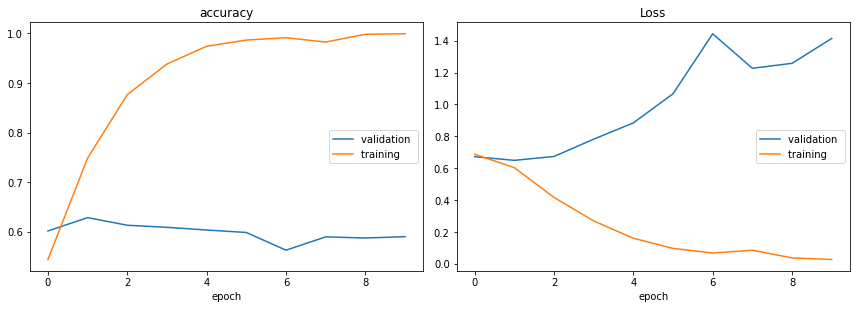

accuracy
	validation       	 (min:    0.563, max:    0.629, cur:    0.590)
	training         	 (min:    0.544, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.649, max:    1.443, cur:    1.414)
	training         	 (min:    0.026, max:    0.687, cur:    0.026)


In [14]:
model1.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=380, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [15]:
model2 = Sequential()
model2.add(Embedding(len(vocabulary) + 1, 50, input_length=max_len))
model2.add(LSTM(32))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 50)           1918550   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,929,207
Trainable params: 1,929,207
Non-trainable params: 0
_________________________________________________________________


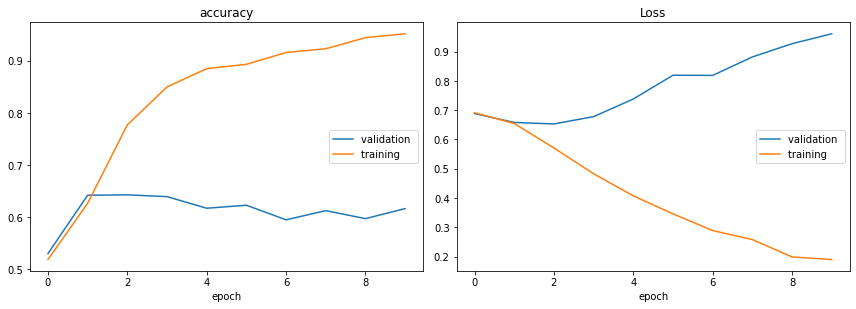

accuracy
	validation       	 (min:    0.530, max:    0.643, cur:    0.616)
	training         	 (min:    0.519, max:    0.952, cur:    0.952)
Loss
	validation       	 (min:    0.653, max:    0.961, cur:    0.961)
	training         	 (min:    0.190, max:    0.691, cur:    0.190)


In [16]:
model2.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=380, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [17]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5990023023791251
